<a href="https://colab.research.google.com/github/smitalk/Predict-GPA-of-students-by-using-exam-score-and-attendance-/blob/master/GPA_Prediction_of_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!ls
!pip install -U statsmodels

1.03.Dummies.csv  drive  sample_data
Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.10.2)


In [0]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'1c-cgqzWWhvlz8O4QZVFKCwMgRz7OBKIJ'}) 
downloaded.GetContentFile('1.03. Dummies.csv') 

raw_data = pd.read_csv('/content/1.03. Dummies.csv')
# Checking the data frame
raw_data


# Map all 'No' entries with 0, and all 'Yes' entries with 1 and put that in a new variable called 'data'
data = raw_data.copy()
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


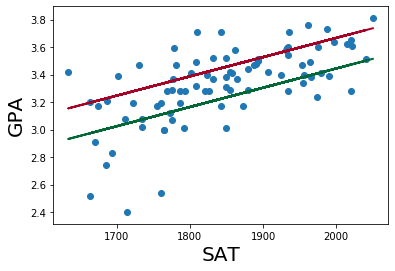

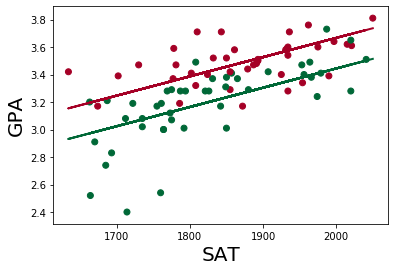

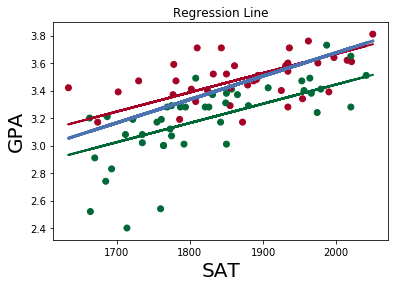

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163


In [0]:
# In regression equation dependent variable (y) is the GPA
y = data ['GPA']
# Independent variable (x) is the SAT score and attendance
x1 = data [['SAT','Attendance']]
# Adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Summary of the regression.
results.summary()
# Scatter plot of SAT and GPA
plt.scatter(data['SAT'],y)
# Two regression equations, depending on whether students attended (yes), or didn't (no)
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
# Plot of two regression lines
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026')
# Name of axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# Scatter plot which contains all observations
plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')

# Two regression equations (one with a dummy = 1, the other with dummy = 0)
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']

# Plot of two regression lines
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()
# Create one scatter plot which contains all observations without dummies

plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')

# Original regression line
yhat = 0.0017*data['SAT'] + 0.275

# Plot the two regression lines
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837', label ='regression line1')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026', label ='regression line2')
# Plot the original regression line
fig = plt.plot(data['SAT'],yhat, lw=3, c='#4C72B0', label ='regression line')

plt.title('Regression Line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# New data frame identical in organization to X.
# The constant is always 1, while each of the lines corresponds to an observation (student)
new_data = pd.DataFrame({'const': 1,'SAT': [1700, 1670], 'Attendance': [0, 1]})
new_data = new_data[['const','SAT','Attendance']]
new_data

new_data.rename(index={0: 'Bob',1:'Alice'})
# Predict method on the regression with the new data as a single argument
predictions = results.predict(new_data)
# The result
predictions
# Creation of prediction data frame work
predictionsdf = pd.DataFrame({'Predictions':predictions})
# Join the two data frames
joined = new_data.join(predictionsdf)
# Rename the indices as before 
joined.rename(index={0: 'Bob',1:'Alice'})